In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
def forwardstart(Epam, Ec, Ew, region, totlen, Emm):
    els = []
    for j in range(totlen):
        el = []
        el.append(Epam)
        el.append(Epam)
        el.append(Epam)
        for i in range(region[0], region[1]):
            if i == j:
                el.append(Emm)
            else:
                el.append(Ec)
        el.append(Ew)
        els.append(el)
    pls = []
    for i in range(len(els)):
        pl = []
        pl.append([0, 0, 0])
        pl.append([0, 1, 0])
        for j in range(len(els[i])-1):
            z = np.exp(-els[i][j])+1+np.exp(els[i][j+1])
            pl.append([np.exp(-els[i][j])/z, 1/z, 1 - 1/z -np.exp(-els[i][j])/z])
        pl.append([0, 1, 0])
        pl.append([0, 0, 0])
        pls.append(pl)
    matrix_array = []
    for j in range(len(pls)):
        matrix = []
        for i in range(len(pls[j])-2):
            line = []
            for k in range(len(pls[j])-2):
                if k == i - 1:
                    line.append(pls[j][k+1][2])
                elif k == i:
                    line.append(pls[j][k+1][1])
                elif k == i + 1:
                    line.append(pls[j][k+1][0])
                else:
                    line.append(0)
            matrix.append(line)
        matrix_array.append(matrix)
    matrix_array = np.array(matrix_array)
    powered_matrix_array = []
    for j in range(len(matrix_array)):
        powered_matrix_array.append(LA.matrix_power(matrix_array[j], 2000000000))
    win_prob_r1 = []
    for j in range(len(powered_matrix_array)):
        win_prob_r1.append(powered_matrix_array[j][len(powered_matrix_array[j][i])-1][1])
    return win_prob_r1

In [3]:
def reversestart(Epam, Ec, Ew, region, totlen, Emm):
    els = []
    for j in range(totlen):
        el = []
        el.append(-Ec)
        el.append(-Ew)
        for i in range(region[0], region[1]):
            if i == region[1]-j-1:
                el.append(-Emm)
            else:
                el.append(-Ec)
        el.append(-Epam)
        el.append(-Epam)
        el.append(-Epam)
        els.append(el)
    pls = []
    for i in range(len(els)):
        pl = []
        pl.append([0, 0, 0])
        pl.append([0, 1, 0])
        for j in range(len(els[i])-1):
            z = np.exp(-els[i][j])+1+np.exp(els[i][j+1])
            pl.append([np.exp(-els[i][j])/z, 1/z, 1 - 1/z -np.exp(-els[i][j])/z])
        pl.append([0, 1, 0])
        pl.append([0, 0, 0])
        pls.append(pl)
    matrix_array = []
    for j in range(len(pls)):
        matrix = []
        for i in range(len(pls[j])-2):
            line = []
            for k in range(len(pls[j])-2):
                if k == i - 1:
                    line.append(pls[j][k+1][2])
                elif k == i:
                    line.append(pls[j][k+1][1])
                elif k == i + 1:
                    line.append(pls[j][k+1][0])
                else:
                    line.append(0)
            matrix.append(line)
        matrix_array.append(matrix)
    matrix_array = np.array(matrix_array)
    powered_matrix_array = []
    for j in range(len(matrix_array)):
        powered_matrix_array.append(LA.matrix_power(matrix_array[j], 2000000000))
    win_prob_r1 = []
    for j in range(len(powered_matrix_array)):
        win_prob_r1.append(powered_matrix_array[j][0][1])
        
    return win_prob_r1

In [4]:
def forward(Estart, Ec, Ew, region, totlen, Emm):
    els = []
    for j in range(totlen):
        el = []
        el.append(Estart)
        for i in range(region[0], region[1]):
            if i == j:
                el.append(Emm)
            else:
                el.append(Ec)
        el.append(Ew)
        els.append(el)
    pls = []
    for i in range(len(els)):
        pl = []
        pl.append([0, 0, 0])
        pl.append([0, 1, 0])
        for j in range(len(els[i])-1):
            z = np.exp(-els[i][j])+1+np.exp(els[i][j+1])
            pl.append([np.exp(-els[i][j])/z, 1/z, 1 - 1/z -np.exp(-els[i][j])/z])
        pl.append([0, 1, 0])
        pl.append([0, 0, 0])
        pls.append(pl)
    matrix_array = []
    for j in range(len(pls)):
        matrix = []
        for i in range(len(pls[j])-2):
            line = []
            for k in range(len(pls[j])-2):
                if k == i - 1:
                    line.append(pls[j][k+1][2])
                elif k == i:
                    line.append(pls[j][k+1][1])
                elif k == i + 1:
                    line.append(pls[j][k+1][0])
                else:
                    line.append(0)
            matrix.append(line)
        matrix_array.append(matrix)
    matrix_array = np.array(matrix_array)
    powered_matrix_array = []
    for j in range(len(matrix_array)):
        powered_matrix_array.append(LA.matrix_power(matrix_array[j], 2000000000))
    win_prob_r1 = []
    for j in range(len(powered_matrix_array)):
        win_prob_r1.append(powered_matrix_array[j][len(powered_matrix_array[j][i])-1][1])
    return win_prob_r1

In [5]:
def reverse(Estart, Ec, Ew, region, totlen, Emm):
    els = []
    for j in range(totlen):
        el = []
        el.append(-Estart)
        el.append(-Ew)
        for i in range(region[0], region[1]):
            if i == region[1]-j-1:
                el.append(-Emm)
            else:
                el.append(-Ec)
        els.append(el)
    pls = []
    for i in range(len(els)):
        pl = []
        pl.append([0, 0, 0])
        pl.append([0, 1, 0])
        for j in range(len(els[i])-1):
            z = np.exp(-els[i][j])+1+np.exp(els[i][j+1])
            pl.append([np.exp(-els[i][j])/z, 1/z, 1 - 1/z -np.exp(-els[i][j])/z])
        pl.append([0, 1, 0])
        pl.append([0, 0, 0])
        pls.append(pl)
    matrix_array = []
    for j in range(len(pls)):
        matrix = []
        for i in range(len(pls[j])-2):
            line = []
            for k in range(len(pls[j])-2):
                if k == i - 1:
                    line.append(pls[j][k+1][2])
                elif k == i:
                    line.append(pls[j][k+1][1])
                elif k == i + 1:
                    line.append(pls[j][k+1][0])
                else:
                    line.append(0)
            matrix.append(line)
        matrix_array.append(matrix)
    matrix_array = np.array(matrix_array)
    powered_matrix_array = []
    for j in range(len(matrix_array)):
        powered_matrix_array.append(LA.matrix_power(matrix_array[j], 2000000000))
    win_prob_r1 = []
    for j in range(len(powered_matrix_array)):
        win_prob_r1.append(powered_matrix_array[j][0][1])
        
    return win_prob_r1

In [6]:
def cut(Estart, Ec, region, totlen, Emm, Ecut, Estop):
    els = []
    for j in range(totlen):
        el = []
        el.append(Ec)
        for i in range(region[0], region[1]):
            if i == j:
                el.append(Emm)
            else:
                el.append(Ec)
        el.append(Estop)
        els.append(el)
    plsm = []
    for j in range(len(els)):
        pls = []
        pls.append([0, 0, 0])
        pls.append([0, 1, 0])
        for i in range(len(els[j])-1):
            p = []
            z = 1 + np.exp(-els[j][i])+np.exp(els[j][i+1])
            p.append((1/(1+np.exp(Ecut))*np.exp(-els[j][i])/z))
            p.append((1/(1+np.exp(Ecut))*1/z))
            p.append((1/(1+np.exp(Ecut))*np.exp(els[j][i+1])/z))
            pls.append(p)
        pls.append([0, 1, 0])
        pls.append([0, 0, 0])
        plsm.append(pls)
    matrix_m = []
    for j in range(len(plsm)):
        matrix = []
        for i in range(len(plsm[j])-2):
            line = []
            if i == len(plsm[j])-3:
                pcut = np.exp(Ecut)/(1+np.exp(Ecut))
                line.append(0)
                for l in range(len(plsm[j])-4):
                    line.append(pcut)
                line.append(1)
                matrix.append(line)
            else:
                for k in range(len(plsm[j])-2):
                    if k == i - 1:
                        line.append(plsm[j][k+1][2])
                    elif k == i:
                        line.append(plsm[j][k+1][1])
                    elif k == i + 1:
                        line.append(plsm[j][k+1][0])
                    else:
                        line.append(0)
                matrix.append(line)
        matrix_m.append(matrix)
    matrix_m = np.array(matrix_m)
    powered_matrix_array = []
    for j in range(len(matrix_m)):
        powered_matrix_array.append(LA.matrix_power(matrix_m[j], 2000000000))
    win_prob_r1 = []
    for j in range(len(powered_matrix_array)):
        win_prob_r1.append(powered_matrix_array[j][len(powered_matrix_array[j][i])-1][1])
        
    return win_prob_r1

In [7]:
def cutrate(Estart, Epam, Ec, Ew1, Ew2, Emm, Ecut, stop1, stop2):
    totlen = 20
    region1 = [0, int(stop1)]
    region2 = [int(stop1), int(stop2)]
    region3 = [int(stop2), totlen]
    Estop = -1000000
    probs = [forwardstart(Epam, Ec, Ew1, region1, totlen, Emm), reversestart(Epam, Ec, Ew1, region1, totlen, Emm),
             forward(Ec, Ec, Ew2, region2, totlen, Emm), reverse(Ec, Ec, Ew2, region2, totlen, Emm),
        cut(Ec, Ec, region3, totlen, Emm, Ecut, Estop)]
    plsm = []
    for i in range(len(probs[0])):
        pls = []
        pls.append([0, 0, 0])
        pls.append([0, 1, 0])
        for j in range(len(probs)):
            pls.append([1-probs[j][i], 0, probs[j][i]])
        pls.append([0, 1, 0])
        pls.append([0, 0, 0])
        plsm.append(pls)

    matrix_array = []
    for j in range(len(plsm)):
        matrix = []
        for i in range(len(plsm[j])-2):
            line = []
            for k in range(len(plsm[j])-2):
                if k == i - 1:
                    line.append(plsm[j][k+1][2])
                elif k == i:
                    line.append(plsm[j][k+1][1])
                elif k == i + 1:
                    line.append(plsm[j][k+1][0])
                else:
                    line.append(0)
            matrix.append(line)
        matrix_array.append(matrix)
    matrix_array = np.array(matrix_array)

    powered_matrix_array = []
    for j in range(len(matrix_array)):
        powered_matrix_array.append(LA.matrix_power(matrix_array[j], 20000))

    win_prob_r1 = []
    for j in range(len(powered_matrix_array)):
        win_prob_r1.append(powered_matrix_array[j][len(powered_matrix_array[j][i])-1][1])
        
    return win_prob_r1

In [8]:
new_x = [3.86200298,   1.97615731,   1.37604725, -10.78843177,
       -10.46460531,  -7.55521697,  -9.14979501,   8.0624071 ,
        16.16372459]

In [9]:
y = []
for i in np.arange(-12, -6, 0.02):
    y.append(cutrate(new_x[0], new_x[1], new_x[2], new_x[3], new_x[4], new_x[5], i, new_x[7], new_x[8]))
y = np.array(y)

In [10]:
df = pd.DataFrame(y, columns = range(1,21))
df = df.set_index(np.arange(-9, -3, 0.02).round(1))
df = df[::-1]

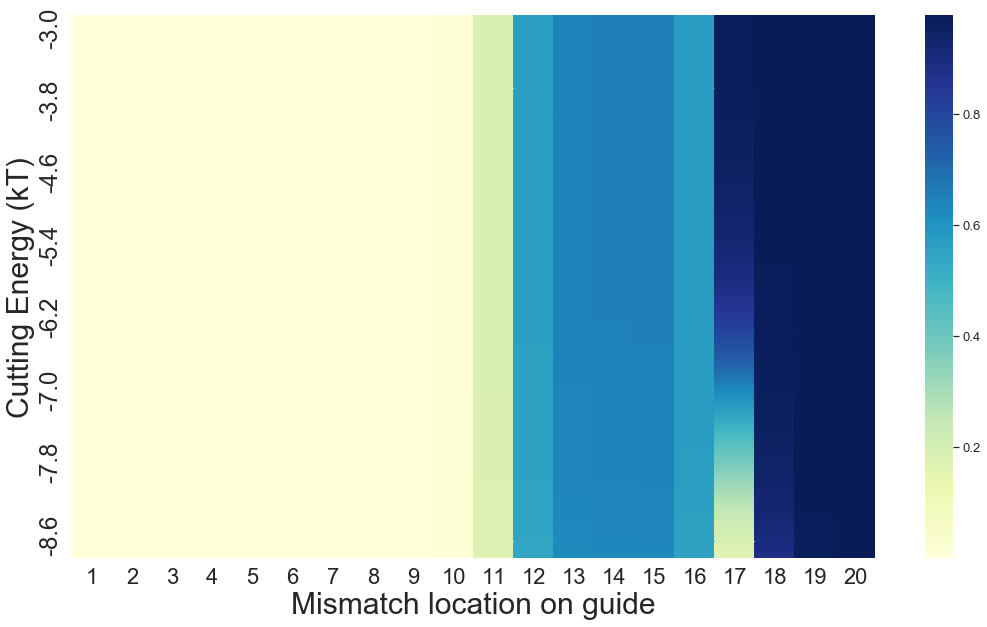

In [13]:
ax = sns.heatmap(data = df, cmap="YlGnBu", yticklabels = 40)
plt.ylabel('Cutting Energy (kT)', fontsize = 30)
plt.xlabel('Mismatch location on guide', fontsize = 30)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 24)
plt.rcParams["figure.figsize"] = (18, 10)